In [1]:
from os.path import join

import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from numpy.random import randn

from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Read image and convert to grayscale
A = imread(join('..', 'DATA', 'dog.jpg')).mean(axis=-1)

## Denoise

# Add some (speckle) noise
# NB uint8 arithmetic in numpy wraps whereas in matlab it clips
# so use float arithmetic and clip explicitly
A_with_noise = np.clip(
    A + np.clip(
        200 * randn(*A.shape),
        0, 255
    ),
    0, 255
)

# Fourier transform of image
Atshift = fftshift(fft2(A_with_noise))

# Mask out all except a central disc in FT
ny, nx = A.shape
X, Y = np.meshgrid(
    np.arange(-nx//2, nx//2),
    np.arange(-ny//2, ny//2)
)
R2 = X**2 + Y**2
ind = R2 < 150**2
Atshiftfilt = Atshift * ind

# Inverse FT to restore image
Afilt = ifft2(ifftshift(Atshiftfilt)).real

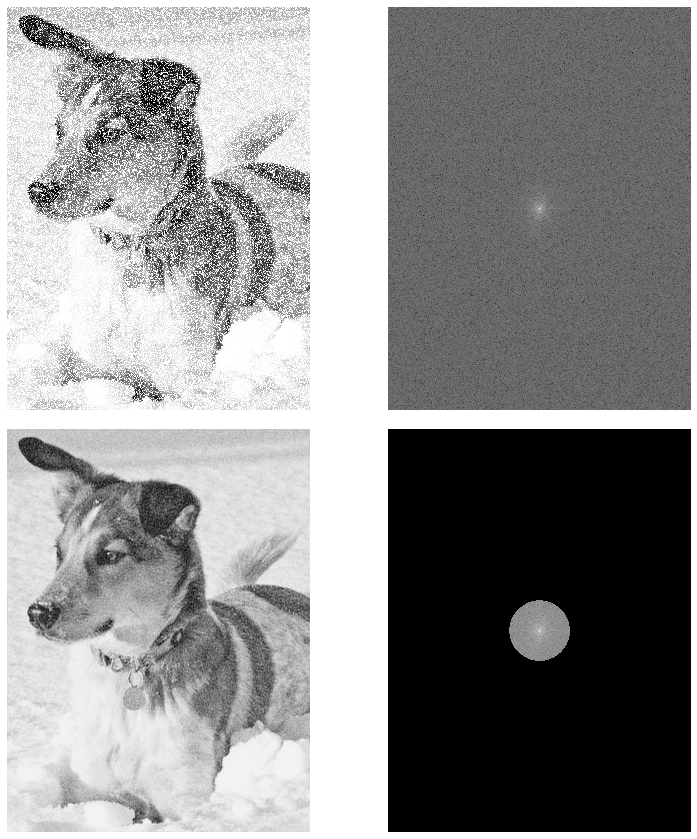

In [3]:
# Put FFTs on log scale for display
F = np.log(abs(Atshift) + 1)
Ffilt = np.log(abs(Atshiftfilt) + 1)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].imshow(A_with_noise, cmap='gray', interpolation='nearest')
axs[0, 0].axis(False)
axs[0, 1].imshow(F, cmap='gray', interpolation='nearest')
axs[0, 1].axis(False)
axs[1, 1].imshow(Ffilt, cmap='gray', interpolation='nearest')
axs[1, 1].axis(False)
axs[1, 0].imshow(Afilt, cmap='gray', interpolation='nearest')
axs[1, 0].axis(False)

plt.tight_layout();